# Fundamentals of Artificial Intelligence Programme (2024/25 Q1)
## Evaluation & Overfitting

### Part 1: Overfitting
Introduction to Machine Learning 2022/2023  
Author: Jan Warchocki, Tom Viering and Juan Molano, revised by Prajit Bhaskaran

**WHAT** This lab consists of some programming and pen and paper exercises.

**WHY** The exercises are meant to familiarize you with the overfitting. This will prepare you for the exam and the project. Handing in the assignments via Vocareum on Friday with a good effort submission will count towards the bonus point.

**HOW** Follow the exercises in the notebook on your own or with a fellow student. For questions and feedback please
consult the TAs during the lab session.

**All questions are graded.**

In [76]:
import sklearn.datasets
import numpy as np
import sklearn.neighbors
import sklearn.metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
np.random.seed(42)

%cd C:\Users\linth\PycharmProjects\FAIP

C:\Users\linth\PycharmProjects\FAIP


**Exercise 1** Using the training, validation, and test sets

In this exercise we will look at what happens if we do *not* use a different set of objects to train, validate and test a classifier. To study this behaviour, let us first generate a new dataset. The feature X is a random number between 0 and 1.
The label y is determined by a fair coin flip: if the coin comes up heads, the label is one, if it comes up negative,
the label is zero.


In [77]:
np.random.seed(1)

# Number of samples
n = 1000

# Dimension of the features
d = 2

X_total = np.random.rand(n,d)
y_total = (np.random.rand(n) > 0.5)

<div style="background-color:#c2eafa">

**Question 1.1** Plot the dataset to see how it behaves. Can you see any learnable patterns?
    
</div>


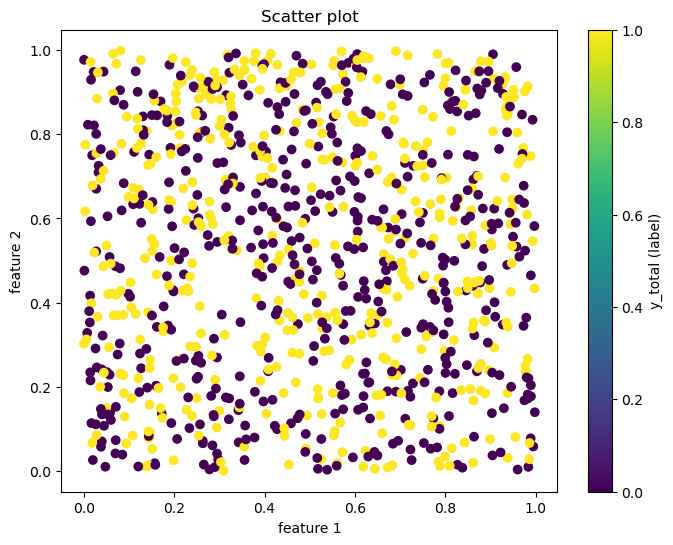

In [78]:
# START ANSWER
plt.figure(figsize=(8,6))
plt.scatter(X_total[:, 0], X_total[:, 1], c=y_total, cmap='viridis')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('Scatter plot')
plt.colorbar(label='y_total (label)')
plt.show()
# END ANSWER

<div style="background-color:#f1be3e">   

[//]: # (START ANSWER)
[//]: # (END ANSWER)
    
</div>

<div style="background-color:#c2eafa">

**Question 1.2** For any classification model trained on this dataset, what will its performance be on a test set? Why?

</div>

<div style="background-color:#f1be3e">   

[//]: # (START ANSWER) 
It will most likely be random, as the data generated is made by flipping a coin. The accuracy, and thus the performance will most likely be around 50%. This is also displayed in the plot, as around half of the points are coloured differently. 

[//]: # (END ANSWER)
    
</div>

Now let's split the whole dataset into two parts: *available* and *unseen*. *Available* data is supposed to simulate the data that would be available to us when solving a real-world problem: it is all the data that we can use to train, tune, and evaluate the model. *Unseen* data simulates the data that our model can encounter once we deploy it. Normally, we would not have access to it, but we simulate it in this exercise to show the need for train, test, and validation splits.


In [79]:
X_unseen, X_available, y_unseen, y_available = sklearn.model_selection.train_test_split(X_total, y_total, test_size=0.2, random_state=42)

We will furthermore split `X_available` and `y_available` into the three sets: for training, validation, and testing.


In [80]:
X_train, X_test_val, y_train, y_test_val = sklearn.model_selection.train_test_split(X_available, y_available, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = sklearn.model_selection.train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

Overall, the splits we have just created can be summarized with the following picture:

// image is missing


| Start  | Split1  | Split2 | Split3  | Final distribution  |
|---|---|---|---|---|
| Data  | Unseen 20% |   |   | 20%  |
|   |  available 80% | Train 70%  |   | 56%  |
|   |   |  test eval 30% |  Test 50% |  12% |
|   |   |   |   Test val 50%| 12% |


<div style="background-color:#c2eafa">

**Question 1.3** Before any implementation, what are the purposes of the training, validation, and testing splits?

</div>

<div style="background-color:#f1be3e">   

[//]: # (START ANSWER)

The purpose of the training set is to train the model itself, so to fit the model and reduce the error rate. 

The purpose of the validation set is to tune the hyperparameters to select the best version of the model. 

The purpose of the testing set is to provide the model with unseen data and test the initial model performances. To test the generalization of the model and detect overfitting. 
- Unseen data -> real evaluation on model with new data. 

The purpose of the splits is to keep them seperate along the training phase to have new data and test model performances and generalization. Without unseen data you risk overfitting. 

[//]: # (END ANSWER)
    
</div>

<div style="background-color:#c2eafa">

**Question 1.4** Now, we will define utility functions that will help us in discovering the importance of having these three sets. First, complete the function below, which should train a KNN classifier with the given parameter `k` on the `X_train` set and evaluate it on the `X_eval` set. The function should return the accuracy of the classifier on the `X_eval` set.

**Note:** The sets `X_train`, `y_train`, `X_eval`, and `y_eval` that the method accepts do not have to be the same training and validation sets that we have defined previously.

</div>


In [81]:
def train_and_evaluate(X_train, y_train, X_eval, y_eval, k):
    # START ANSWER

    # model selection with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)

    # fitting the model to the train data
    knn.fit(X_train, y_train)

    # make a prediction based on evaluation data 
    y_pred = knn.predict(X_eval)

    # get accuracy score out of prediction
    acc = accuracy_score(y_eval, y_pred)
    
    # END ANSWER
    return acc

In [82]:
X_a = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_a = np.array([0, 1, 1, 1])
X_b = np.array([[0.3, 0.3], [1, 0.3], [0.9, 0.8]])
y_b = np.array([1, 1, 1])
accuracy = train_and_evaluate(X_a, y_a, X_b, y_b, 1)
assert abs(accuracy - 2. / 3) < 1e-3 # for verification purposes

<div style="background-color:#c2eafa">

**Question 1.5** Next, we define the function `search_k`, which searches over the values of `k` and finds the optimal one on the `X_eval` set. Complete the function below by measuring the accuracy of the KNN classifier with values of `k` ranging from **1 to 20** (inclusive). The classifier should be trained on the `X_train` set and the accuracy should be measured on the `X_eval` set. You may use the function `train_and_evaluate` from before.

</div>


In [83]:
def search_k(X_train, y_train, X_val, y_val):
    
    # START ANSWER
    k_values = range(1,21)
    accuracies = list(map(lambda k: train_and_evaluate(X_train, y_train, X_val, y_val, k), k_values))  
    
    # END ANSWER

    k = np.argmax(accuracies)
    print("Best k is {} with an accuracy of {}".format(k + 1, accuracies[k]))
    xs = [x + 1 for x in range(len(accuracies))]
    plt.plot(xs, accuracies)
    plt.plot(k + 1, accuracies[k], 'ro')
    plt.xlabel("$k$")
    plt.ylabel("Accuracy on training set")
    plt.show()
    return k + 1

Best k is 11 with an accuracy of 1.0


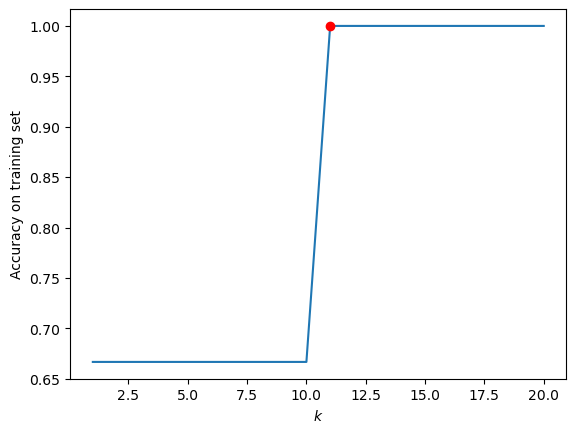

In [84]:
X_a = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_a = np.array([0, 1, 1, 1])
X_b = np.array([[0.3, 0.3], [1, 0.3], [0.9, 0.8]])
y_b = np.array([1, 1, 1])

# need to repeat to get more samples than k
X_a = np.tile(X_a, [5, 1])
y_a = np.tile(y_a, [5, ])
X_b = np.tile(X_b, [5, 1])
y_b = np.tile(y_b, [5, ])

best_k = search_k(X_a, y_a, X_b, y_b)
assert best_k == 11

We will now explore what will happen if we both train and evaluate the classifier on the `X_train` set.

<div style="background-color:#c2eafa">

**Question 1.6** Before implementing this, which value for `k` do you expect to find to be optimal if you use tuning on the training set? 
    
</div>

<div style="background-color:#f1be3e">   

[//]: # (START ANSWER)

We're expecting to find low k values (for example k=1 or k=2) to be optimal when tuning on the training set, because the model can 'memorize' the previous given data. 

[//]: # (END ANSWER)
    
</div>

<div style="background-color:#c2eafa">

**Question 1.7** Complete the code below to find the optimal value of `k` when training and evaluating the KNN model on the training set `X_train`. You may use the functions defined previously.
    
</div>


Best k is 1 with an accuracy of 1.0


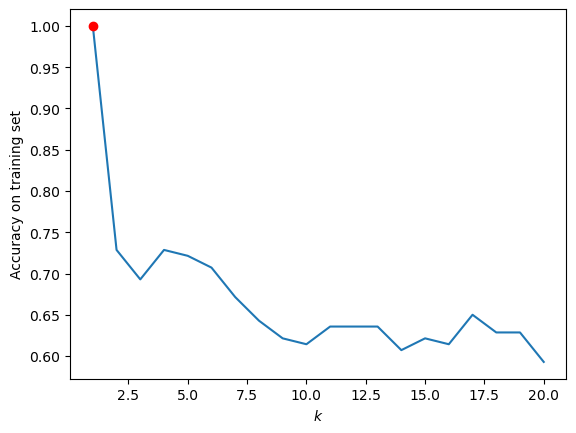

In [85]:
# START ANSWER
best_k = search_k(X_train, y_train, X_train, y_train)
# END ANSWER

In [86]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<div style="background-color:#c2eafa">

**Question 1.8** Which $k$ gives the lowest error? Does this agree with your prediction? What do you think the performance on unseen data will be?

</div>

<div style="background-color:#f1be3e">   

[//]: # (START ANSWER)

Lowest k's give indeed the lowest error (highest accuracy). It agrees with our prediction that the lowest k's perform best. The performance on unseen data with these low k's will not be high, because the model will not be very good at generalization. 

[//]: # (END ANSWER)

</div>

Test this by applying the classifier (using the $k$ that minimized the error on the training data) to the unseen objects
(`X_unseen`) and store its accuracy result in the `unseen_acc` variable. You may use the utility functions we defined earlier.


In [87]:
# START ANSWER
unseen_acc = train_and_evaluate(X_train, y_train, X_unseen, y_unseen, 1)

# END ANSWER

print(f'Accuracy on the unseen set with k=1: {unseen_acc}')

Accuracy on the unseen set with k=1: 0.51375


In [88]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Now, we will see what happens when we use the test set `X_test` for tuning `k`.

<div style="background-color:#c2eafa">

**Question 1.9** Complete the code below to find the optimal value of `k` when training the model on `X_train` and evaluating on `X_test`.
    
</div>


Best k is 15 with an accuracy of 0.6


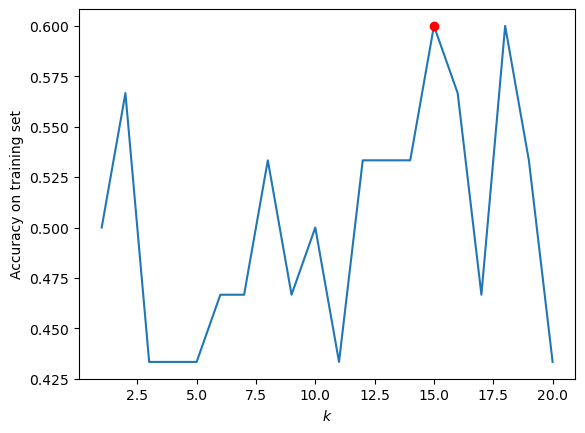

In [89]:
# START ANSWER

best_k = search_k(X_train, y_train, X_test, y_test)

# END ANSWER

In [90]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<div style="background-color:#c2eafa">

**Question 1.10** Which $k$ gives the highest accuracy? If we were to use this classifier, will the accuracy on the unseen objects be similar?

</div>

<div style="background-color:#f1be3e">   

[//]: # (START ANSWER)

A k = 15 gives the highest accuracy (0.6). The accuracy on unseen objects is expected to be more or less similar to this accuracy if the model is not overfitting. 

[//]: # (END ANSWER)

</div>

</div>

<div style="background-color:#f1be3e">   

[//]: # (START ANSWER)
[//]: # (END ANSWER)

</div>

<div style="background-color:#c2eafa">

**Question 1.11** Test this by applying the classifier (using the $k$ that minimized the error on the test data) to the unseen objects (`X_unseen`) and store its accuracy result in the `unseen_acc` variable.
    
</div>


In [91]:
# START ANSWER
unseen_acc = train_and_evaluate(X_train, y_train, X_unseen, y_unseen, 15)
# END ANSWER

print(f'Accuracy on the unseen set with k=15: {unseen_acc}')

Accuracy on the unseen set with k=15: 0.485


In [92]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<div style="background-color:#c2eafa">

**Question 1.12** How is it possible that the performance on the test set is (misleadingly) good, while the performance on the unseen data is quite bad? 
    
</div>

<div style="background-color:#f1be3e">   

[//]: # (START ANSWER)

The model is most likely overfitting. So there is high variance, the model is too flexible/complex. The model is probably fitting on much noise in the training set or is using too little data. 

[//]: # (END ANSWER)
    
</div>

Let us now investigate what happens if we use all three dataset splits.

<div style="background-color:#c2eafa">

**Question 1.13** Complete the code below to find the optimal value of `k` when training the model on `X_train` and evaluating on `X_val`.
    
**Note:** It is important that you now evaluate on `X_val`, not on `X_test`.
    
</div>


Best k is 4 with an accuracy of 0.8


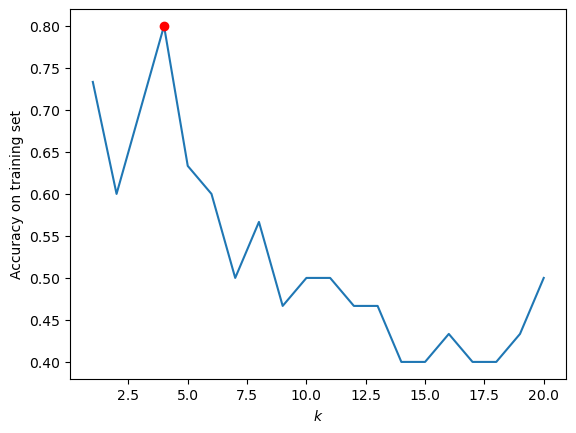

In [93]:
# START ANSWER
best_k = search_k(X_train, y_train, X_val, y_val)
# END ANSWER

In [94]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<div style="background-color:#c2eafa">

**Question 1.14** Which $k$ gives the lowest error? For this $k$, evaluate the KNN performance on the test set `X_test` and store the result in `test_acc`. Complete the following code:

</div>


In [95]:
# START ANSWER
test_acc = train_and_evaluate(X_train, y_train, X_test, y_test, 4)
# END ANSWER

print(f'Accuracy on the test set with k=4: {test_acc}')

Accuracy on the test set with k=4: 0.43333333333333335


In [96]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<div style="background-color:#c2eafa">

**Question 1.15** Verify check that this estimate is closer to the truth by assessing the performance on the unseen data for this model.
    
</div>


In [97]:
# START ANSWER
unseen_acc = train_and_evaluate(X_train, y_train, X_unseen, y_unseen, 4)
# END ANSWER

print(f'Accuracy on the unseen set with k=4: {unseen_acc}')

Accuracy on the unseen set with k=4: 0.4925


In [98]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Above, every time we change the random seeds and the random state of the splitting procedure, the results change.
So let us repeat the above procedure 100 times and average to get more trustworthy results. So you can indeed see that this pattern is real and not just by luck (!). 

We split the data in 3 parts: train, validation and test. Each time, we tune $k$ using the validation data. For the model with the best $k$ on the validation data, we measure its performance on the validation and test data. We do this 100 times, and average the results.


In [99]:
acc_val_best_k = []
acc_test_best_k = []

for repeat in range(0,100):
    # Generate datasets
    X_total = np.random.rand(n,d)
    y_total = (np.random.rand(n) > 0.5)

    # Split into parts
    X_unseen, X_available, y_unseen, y_available = sklearn.model_selection.train_test_split(X_total, y_total, test_size=0.2)
    X_train, X_test_val, y_train, y_test_val = sklearn.model_selection.train_test_split(X_available, y_available, test_size=0.3)
    X_test, X_val, y_test, y_val = sklearn.model_selection.train_test_split(X_test_val, y_test_val, test_size=0.5)

    # Measure performance for k = 1,...,20
    acc_val = []
    for k in range(1, 21):
        acc = train_and_evaluate(X_train, y_train, X_val, y_val, k)
        acc_val.append(acc)

    # Get model with best k on validation data
    k = np.argmax(acc_val)
    acc_val_best_k.append(acc_val[k])
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k+1)
    model.fit(X_train, y_train)  
    
    # Measure it's performance on the test data
    acc_test_best_k.append(model.score(X_test,y_test))

In [100]:
acc_val_best_k_average = np.mean(np.array(acc_val_best_k))
acc_test_best_k_average = np.mean(np.array(acc_test_best_k))

print(f'The parameter k of the model is chosen using the validation set. ')
print("Average accuracy of this model on the validation data: %.2f" % acc_val_best_k_average)
print("Average accuracy of this model on the test data: %.2f" % acc_test_best_k_average)

The parameter k of the model is chosen using the validation set. 
Average accuracy of this model on the validation data: 0.61
Average accuracy of this model on the test data: 0.49


In [101]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


<div style="background-color:#c2eafa">

**Question 1.16** Are these results in line with your previous findings? 

</div>

<div style="background-color:#f1be3e">   
    
[//]: # (START ANSWER)

Previous findings: 
- validation set -> Best k is 4 with an accuracy of 0.8
- test set -> Accuracy on the test set with k=4: 0.43333333333333335
- unseen set -> Accuracy on the unseen set with k=4: 0.4925

The validation data is somewhat lower in this averaging than my validation set. The test data is more or less in line with the unseen data (and test data is lower in my set).

[//]: # (END ANSWER)

</div>

<div style="background-color:#c2eafa">

**Question 1.17** If we use (train, val, test), why is the performance estimate on the test set more in line with the truth? Why was this not the case when using only a (train, test) set? 

</div>  

<div style="background-color:#f1be3e">   

[//]: # (START ANSWER)

train, test -> Best k is 15 with an accuracy of 0.6(And accuracy on the unseen set with k=15: 0.485)
VERSUS train, val, test set -> Accuracy on the test set with k=4: 0.43333333333333335 (and  unseen set -> Accuracy on the unseen set with k=4: 0.4925)

In the first case, the test set is used for tuning the hyperparameters, and thus leads to overfitting of the model. The model 'learns' in this case from the test data. So the performance will be higher than it actually is. 
In the second case the tuning happens with the validation and testing is done with unseen data, leading to a more unbiased and realistic result.

[//]: # (END ANSWER)
    
</div>

**Exercise 2** Size of the split

In practice we are only given limited data. This always raises the question: how much should be used for training, and how much for testing? In this exercise we explore this trade-off. 

Consider two types of errors: the error our classifier makes on the limited test set we are given and
the error on a large amount of unseen objects. We will use the latter to study what causes the variation we observe
in the estimate of the error on a limited test set.

Let's first create our dataset.


In [102]:
from sklearn.datasets import make_moons
X_all, y_all = make_moons(1000, noise=0.9, random_state=555)
(X_unseen, X, y_unseen, y) = sklearn.model_selection.train_test_split(X_all, y_all, test_size=0.1)

The piece of code below is given. It will repeatedly generate training and test sets extracted from `X` and `y`, `repeat` times. We will use the large unseen data to get a good estimate of the real error, but otherwise it will not be used during training or testing. 

The amount of testing samples is determined by the `ratio` parameter, given by the formula:  

$$
\text{ratio} = \frac{\text{size of the test set}}{\text{size of the training set}}
$$


In [103]:
import pandas as pd

def calculate_errors (ratio, repeats=10):
    errors = np.zeros([repeats,2])
    for i in range(0,repeats):
        (X_train, X_test, y_train, y_test) = sklearn.model_selection.train_test_split(X, y, test_size=ratio)
        if i == 0:
            print('We have %d objects in the training set, and %d objects in the test set' % (X_train.shape[0],X_test.shape[0]))
        NCC = NearestCentroid()
        errors[i, 0] = 1 - NCC.fit(X_train, y_train).score(X_test, y_test)
        errors[i, 1] = 1 - NCC.fit(X_train, y_train).score(X_unseen, y_unseen)
    calculated_errors = pd.DataFrame(errors, columns=['error on test set', 'error on unseen dataset'])
    return calculated_errors

We will first call `calculate_errors` with a ratio such that the number of training objects is **large** (`ratio=0.1`). Run the code and look at the `errors` matrix.


In [107]:
errors = calculate_errors(0.1)
errors

We have 90 objects in the training set, and 10 objects in the test set


,error on test set,error on unseen dataset
0,0.2,0.277778
1,0.3,0.273333
2,0.2,0.275556
3,0.4,0.285556
4,0.1,0.275556
5,0.3,0.282222
6,0.2,0.271111
7,0.3,0.270000
8,0.3,0.272222
9,0.1,0.275556


The first columns of this matrix contains the errors as estimated on the
test set, while the second column is the error on the unseen objects. Because the set of unseen objects is so large, the error estimated in the second column is very thrustworthy. 

<div style="background-color:#c2eafa">

**Question 2.1** What are **two** main causes of the variation of the numbers in the **first** column? 

</div>

<div style="background-color:#f1be3e">   

[//]: # (START ANSWER)

1. In each repeat, the model chooses a random part test and train from the total data set, while the ratio stays the same. So the test set is varying due to random splitting, and this is affecting the model's performance. 
2. Sensitivity of the model (is based on distribution of points and thus sensitive of this). 


[//]: # (END ANSWER)
    
</div>

<div style="background-color:#c2eafa">

**Question 2.2** Why is there variation in numbers in the **second** column? Give **one** reason.

</div>    

<div style="background-color:#f1be3e">   

[//]: # (START ANSWER)

The model changes slightly during each iteration (because if differing training data). This affects how the model predicts on the unseen data and hence the variations in performance in the second column. 

[//]: # (END ANSWER)
    
</div>

Now we will re-run the `calculate_errors` method with a ratio such that the number of training objects is **small** (`ratio=0.9`). Run the code and look at the matrix `errors`.


In [114]:
errors = calculate_errors(0.9)
errors

We have 10 objects in the training set, and 90 objects in the test set


,error on test set,error on unseen dataset
0,0.655556,0.652222
1,0.277778,0.296667
2,0.311111,0.285556
3,0.300000,0.302222
4,0.311111,0.284444
5,0.333333,0.270000
6,0.288889,0.258889
7,0.288889,0.272222
8,0.366667,0.391111
9,0.388889,0.304444


<div style="background-color:#c2eafa">

**Question 2.3** Compare these results to the previous ones. What has changed? 

</div>

<div style="background-color:#f1be3e">   
    
[//]: # (START ANSWER)

More variability in both first and second column. Overall errors are higher. So the model's performance on generalization is worse than before. The training size is way smaller, so the model is undertrained causing a decrease in performance. 

[//]: # (END ANSWER)

</div>

<div style="background-color:#c2eafa">
    
**Question 2.4** This time one cause for the randomness in the **first** column is more important than the other. Which factor is now more important and why?
    
</div>

<div style="background-color:#f1be3e">   

[//]: # (START ANSWER)

Sensitivity of the model is highly depending on the training set. So this is very much affected by a small training set, causing more randomness. 


[//]: # (END ANSWER)
    
</div>

<div style="background-color:#c2eafa">

**Question 2.5** What are the pro's of using a large training set and a small test set? And what are the pro's of using a small training set and a large test set? What would you use in practice?

</div>

<div style="background-color:#f1be3e">   

[//]: # (START ANSWER)

Large training set/ small test set
- Better model performance due to larger learning process
- Less likely overfitting

Small training/ large test set
- More robuust on unseen data, generalization is better
- Quick evaluation of the model
- Lower computational costs for training


In practice we would use a large training set and smaller test set for better generalization (ultimate goal of Machine Learning!!)

[//]: # (END ANSWER)
    
</div>

**Exercise 3** Cross validation

<div style="background-color:#c2eafa">

**Question 3.1** Consider the dataset showed in the following figure. By hand, calculate the leave-one-out cross-validation error of the 1-nearest neighbor classifier.

</div>

![cross_validation](images/exercise_5_cross_validation.png)

<div style="background-color:#f1be3e">   

[//]: # (START ANSWER)

Applying 1-nearest neighbor for each point in the data set gives 2/5 errors (mismatch between acutal/predicted) = 0.4 (40%) error rate. 

[//]: # (END ANSWER)
    
</div>

### Part 2: Evaluation

**Questions 1.4 and 1.6 are graded.**


**Exercise 1** Classifier evaluation

<div style="background-color:#c2eafa">


**Question 1.1** Imagine that student B trained a classifier on some data and obtained accuracy of $80\%$.
Is this classifier good? Explain why (not).



<div style="background-color:#f1be3e">


[//]: # (START ANSWER)
That depends on the data. If the variables are not evenly distributed and there is a higher occurence of one of the variables, you also get a higher accuracy of the data in this case, because more variables are predicted in favor of the highest occurence. So 80% accuracy is maybe not that great. But if the data is more evenly distributed, the accuracy is okay, because it is better than change. 

[//]: # (END ANSWER)

For the next few questions we will be using the following classifier. Class A, B, and C are indicated by the blue, green, and red points respectively 

![classifier_evaluation](images/exercise_7_classifier_evaluation.png)

<div style="background-color:#c2eafa">


**Question 1.2** Create a confusion matrix for this classifier.

[//]: # (START ANSWER)

|   | A |  B | C  |
|---|---|---|---|
|  A | 15  | 5  |  1 |
| B  |  4 | 9  | 1  |
|  C |  9 |  0 |  1 |

[//]: # (END ANSWER)

<div style="background-color:#c2eafa">


**Question 1.3** What is the percentage of errors in class A?

<div style="background-color:#f1be3e">

[//]: # (START ANSWER)
Error rate | A = 6/21 = 0.28 -> 28,6%

[//]: # (END ANSWER)

<div style="background-color:#c2eafa">


**Question 1.4** Given the priors $P(A) = 0.25$, $P(B) = 0.25$, and $P(C) = 0.5$,
estimate the error rate of this classifier. The error rate for objects belonging to class B is 0.36 and for C is 0.10. 

<div style="background-color:#f1be3e">


[//]: # (START ANSWER)
Error rate = 0.28 * 0.25 + 0.36 * 0.25 + 0.10 * 0.5 = 0.21

[//]: # (END ANSWER)

In the next two questions we will use the the following ROC curve calculated for some classifier

![roc](images/exercise_7_roc.png)

<div style="background-color:#c2eafa">


**Question 1.5** Estimate (approximately) the AUC (area under the curve).

<div style="background-color:#f1be3e">


[//]: # (START ANSWER)
Approximately 0.74

[//]: # (END ANSWER)


Now, let us assume that the costs of a FP is 4 euro and the cost of FN is 1 euro

<div style="background-color:#c2eafa">


**Question 1.6** Compute the costs for the 3 highlighted points on the ROC curve. Which operating point would you choose?

<div style="background-color:#f1be3e">


[//]: # (START ANSWER)
The lowest point ((0.1,0.4)) because that has the lowest total costs (0.1*4 + (1-0.4)*1 = 1). 
  
[//]: # (END ANSWER)



<div style="background-color:#c2eafa">


**Question 1.7** Give an example of classification problem where a False Negative is much more costly than a
False Positive that was not mentioned during the lecture.

<div style="background-color:#f1be3e">


[//]: # (START ANSWER)
An example could be a fire detection system that could not identify a fire when there actually is a fire instead of an alarm that goes off when there is not anything happening (the latter happened during on of our lab sessions ;)). 

[//]: # (END ANSWER)